# **Exploratory Data Analysis (EDA)**

**1. Import Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

**1. Load the Dataset**

In [2]:
dataset = pd.read_csv(r'C:\Users\Vivek\PycharmProjects\Project\Project_main\Dataset\dataset.csv')
print(dataset.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [3]:
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Fungal infection,skin rash,itching,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4921,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4922,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0
4923,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# Types of Disease in dataset
disease_counts = dataset['Disease'].value_counts()
print(disease_counts)

Disease
Impetigo                                   123
Fungal infection                           122
Allergy                                    120
Chronic cholestasis                        120
GERD                                       120
Peptic ulcer diseae                        120
AIDS                                       120
Diabetes                                   120
Drug Reaction                              120
Gastroenteritis                            120
Bronchial Asthma                           120
Migraine                                   120
Hypertension                               120
Paralysis (brain hemorrhage)               120
Jaundice                                   120
Malaria                                    120
Cervical spondylosis                       120
Dengue                                     120
Typhoid                                    120
hepatitis A                                120
Hepatitis B                                120
Hepat

**2. Get the Statistical Details**

In [5]:
print(dataset.describe())

         Disease  Symptom_1  Symptom_2 Symptom_3    Symptom_4  Symptom_5  \
count       4925       4925       4925      4925         4577       3719   
unique        41         37         52        56           53         41   
top     Impetigo   vomiting   vomiting   fatigue   high_fever   headache   
freq         123        822        870       726          378        348   

       Symptom_6        Symptom_7        Symptom_8           Symptom_9  \
count       2939             2273             1949                1697   
unique        33               27               22                  23   
top       nausea   abdominal_pain   abdominal_pain   yellowing_of_eyes   
freq         390              264              276                 228   

                Symptom_10     Symptom_11 Symptom_12    Symptom_13  \
count                 1517           1199        749           509   
unique                  22             19         12             9   
top      yellowing_of_eyes   irritabil

**3. Get information about dataset**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4925 non-null   object
 1   Symptom_1   4925 non-null   object
 2   Symptom_2   4925 non-null   object
 3   Symptom_3   4925 non-null   object
 4   Symptom_4   4577 non-null   object
 5   Symptom_5   3719 non-null   object
 6   Symptom_6   2939 non-null   object
 7   Symptom_7   2273 non-null   object
 8   Symptom_8   1949 non-null   object
 9   Symptom_9   1697 non-null   object
 10  Symptom_10  1517 non-null   object
 11  Symptom_11  1199 non-null   object
 12  Symptom_12  749 non-null    object
 13  Symptom_13  509 non-null    object
 14  Symptom_14  311 non-null    object
 15  Symptom_15  245 non-null    object
 16  Symptom_16  197 non-null    object
 17  Symptom_17  77 non-null     object
dtypes: object(18)
memory usage: 692.7+ KB


In [7]:
dataset


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Fungal infection,skin rash,itching,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4921,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4922,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0
4923,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0


**4. Converting Categorical Data into Numerical using One Hot Encoding**

In [8]:
for col in dataset.columns:
    dataset[col] = dataset[col].str.replace('_', ' ')

In [9]:
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Removing the white space in each cell of Dataframe
cols = dataset.columns
data = dataset[cols].values.flatten()
s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(dataset.shape)
dataset = pd.DataFrame(s, columns=cols)
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin rash,dischromic patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin rash,nodal skin eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


handling the missing values   

In [11]:
dataset.fillna(0, inplace=True)
print(dataset.head())

            Disease  Symptom_1             Symptom_2             Symptom_3  \
0  Fungal infection    itching             skin rash  nodal skin eruptions   
1  Fungal infection  skin rash  nodal skin eruptions   dischromic  patches   
2  Fungal infection    itching  nodal skin eruptions   dischromic  patches   
3  Fungal infection    itching             skin rash   dischromic  patches   
4  Fungal infection    itching             skin rash  nodal skin eruptions   

             Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0  dischromic  patches         0         0         0         0         0   
1                    0         0         0         0         0         0   
2                    0         0         0         0         0         0   
3                    0         0         0         0         0         0   
4                    0         0         0         0         0         0   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symptom_14 Symptom_15  \
0  

In [12]:
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin rash,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal skin eruptions,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin rash,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Fungal infection,skin rash,itching,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4921,Fungal infection,itching,skin rash,nodal skin eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4922,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0
4923,Impetigo,skin rash,high fever,blister,red sore around nose,yellow crust ooze,0,0,0,0,0,0,0,0,0,0,0,0


# **Symptoms Severnity**

**1. Load the Dataset**

In [13]:
severity = pd.read_csv(r'C:\Users\Vivek\PycharmProjects\Project\Project_main\Dataset\Symptom-severity.csv')

In [14]:
severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [15]:
# remove the slashs from the dataset
severity['Symptom'] = severity['Symptom'].str.replace('_', ' ')
print(severity.head())

                Symptom  weight
0               itching       1
1             skin rash       3
2  nodal skin eruptions       4
3   continuous sneezing       4
4             shivering       5


Encoding the dataset symtoms with the weights given

In [16]:
vals = dataset.values
symptoms = severity['Symptom'].unique()

In [17]:
for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = severity[severity['Symptom'] == symptoms[i]]['weight'].values[0]

convert the encoded data series into the dataframe

In [18]:
vals

array([['Fungal infection', np.int64(1), np.int64(3), ..., 0, 0, 0],
       ['Fungal infection', np.int64(3), np.int64(4), ..., 0, 0, 0],
       ['Fungal infection', np.int64(1), np.int64(4), ..., 0, 0, 0],
       ...,
       ['Impetigo', np.int64(3), np.int64(7), ..., '0', '0', '0'],
       ['Impetigo', np.int64(3), np.int64(7), ..., '0', '0', '0'],
       ['Impetigo', np.int64(3), np.int64(2), ..., '0', '0', '0']],
      shape=(4925, 18), dtype=object)

In [19]:
cols = dataset.columns
dataset = pd.DataFrame(vals,columns=cols)
dataset

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,dischromic patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Fungal infection,3,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4921,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4922,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4923,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0


Check for non-encoded cell

In [20]:
temp = []
for i in range(1,18):
  temp.append(dataset[f'Symptom_{i}'].value_counts())

In [21]:
temp

[Symptom_1
 3    1930
 4    1074
 5     972
 1     679
 6     120
 2     120
 7      30
 Name: count, dtype: int64,
 Symptom_2
 3                      1699
 5                      1500
 4                      1116
 7                       350
 2                       133
 6                       108
 foul smell of urine      18
 1                         1
 Name: count, dtype: int64,
 Symptom_3
 4                      1979
 3                      1014
 5                       852
 7                       378
 2                       360
 6                       222
 foul smell of urine      84
 dischromic  patches      36
 Name: count, dtype: int64,
 Symptom_4
 4                      1110
 5                       900
 3                       846
 2                       704
 7                       553
 0                       348
 6                       348
 dischromic  patches      72
 spotting  urination      42
 0                         2
 Name: count, dtype: int64,
 Symptom_5
 4

In [22]:
dataset = dataset.replace('dischromic  patches', 0)
pd.set_option('future.no_silent_downcasting', True)
dataset = dataset.replace('spotting  urination', 0)
dataset = dataset.replace('foul smell of urine', 0)
print(dataset.head())

dataset

C:\Users\Vivek\AppData\Local\Temp\ipykernel_15028\1689237643.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace('dischromic  patches', 0)


            Disease  Symptom_1 Symptom_2 Symptom_3 Symptom_4 Symptom_5  \
0  Fungal infection          1         3         4         0         0   
1  Fungal infection          3         4         0         0         0   
2  Fungal infection          1         4         0         0         0   
3  Fungal infection          1         3         0         0         0   
4  Fungal infection          1         3         4         0         0   

  Symptom_6 Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11 Symptom_12  \
0         0         0         0         0          0          0          0   
1         0         0         0         0          0          0          0   
2         0         0         0         0          0          0          0   
3         0         0         0         0          0          0          0   
4         0         0         0         0          0          0          0   

  Symptom_13 Symptom_14 Symptom_15 Symptom_16 Symptom_17  
0          0          0    

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,Fungal infection,3,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4921,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4922,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0
4923,Impetigo,3,7,4,2,3,0,0,0,0,0,0,0,0,0,0,0,0


Checkt the ratio of (Symptom:Disease)

In [23]:
print("Number of symptoms:", len(severity['Symptom'].unique()))
print("Number of diseases:", len(dataset['Disease'].unique()))

Number of symptoms: 132
Number of diseases: 41


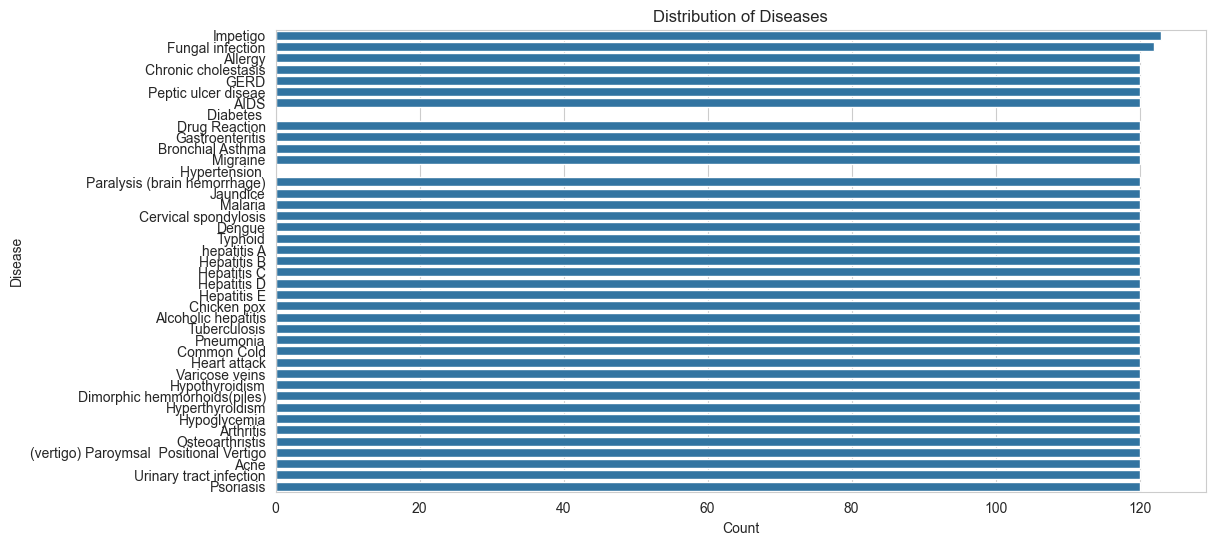

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y=dataset['Disease'], order=disease_counts.index)
plt.title("Distribution of Diseases")
plt.xlabel("Count")
plt.ylabel("Disease")
plt.show()

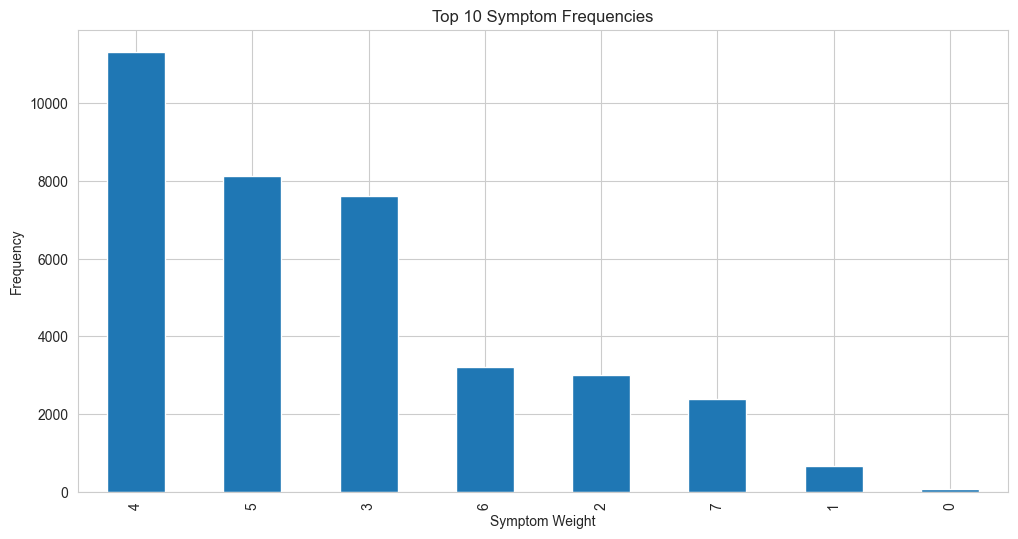

In [25]:
symptom_cols = [f'Symptom_{i}' for i in range(1, 18)]
symptom_counts = dataset[symptom_cols].stack().value_counts()
plt.figure(figsize=(12, 6))
symptom_counts[1:11].plot(kind='bar')  # Top 10 symptoms (excluding 0)
plt.title("Top 10 Symptom Frequencies")
plt.xlabel("Symptom Weight")
plt.ylabel("Frequency")
plt.show()

# **Split Dataset into training and testing dataset**

**Encoded Dataset**

In [26]:
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Split dataset into Training and Label Dataset**

In [27]:
X = dataset.iloc[:,1:].values
y = dataset['Disease'].values

In [28]:
X

array([[1, np.int64(3), np.int64(4), ..., 0, 0, 0],
       [3, np.int64(4), 0, ..., 0, 0, 0],
       [1, np.int64(4), 0, ..., 0, 0, 0],
       ...,
       [3, np.int64(7), np.int64(4), ..., '0', '0', '0'],
       [3, np.int64(7), np.int64(4), ..., '0', '0', '0'],
       [3, np.int64(2), np.int64(4), ..., '0', '0', '0']],
      shape=(4925, 17), dtype=object)

In [29]:
y

array(['Fungal infection', 'Fungal infection', 'Fungal infection', ...,
       'Impetigo', 'Impetigo', 'Impetigo'], shape=(4925,), dtype=object)

In [30]:
y.dtype

dtype('O')

**Splits the 'X' set into Training and Testing set**

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3940, 17)
X_test shape: (985, 17)
y_train shape: (3940,)
y_test shape: (985,)


In [33]:
# get the set size
print("X_train.dtype:", X_train.dtype)
print("X_test.dtype:", X_test.dtype)
print("y_train.dtype:", y_train.dtype)
print("y_test.dtype:", y_test.dtype)


X_train.dtype: object
X_test.dtype: object
y_train.dtype: object
y_test.dtype: object


# **Model Selection**

## Model 1: Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
model_RFC = RandomForestClassifier(
    n_estimators=200,  # Increased trees for better robustness
    max_depth=10,      # Limit depth to prevent overfitting
    min_samples_split=5,
    random_state=42
)

Train Model

In [36]:
model_RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [37]:
# Cross-validation
cv_scores = cross_val_score(model_RFC, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9857868  0.98071066 0.9928934  1.         0.99796954]
Mean CV Accuracy: 0.9914720812182741


Evaluate Model

In [38]:
y_RFC = model_RFC.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_RFC))

Random Forest Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.93      1.00      0.96        27
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      0.96      0.98        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      0.90      0.95        21
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      0.92      0.96        25
                            Common Cold       1.00      1.00      1.00 

In [39]:
# Confidence scores (prediction probabilities)
y_RFC_probs = model_RFC.predict_proba(X_test)
print("Sample Confidence Scores (Top 5):", y_RFC_probs[:5].max(axis=1))

Sample Confidence Scores (Top 5): [0.39666938 0.97620769 0.94648017 0.98457212 1.        ]


Calcualte the Precision, Recall And Accuracy Score for our model

In [40]:
print(classification_report(y_test,y_RFC))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.93      1.00      0.96        27
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      0.96      0.98        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      0.90      0.95        21
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      0.92      0.96        25
                            Common Cold       1.00      1.00      1.00        19
                           

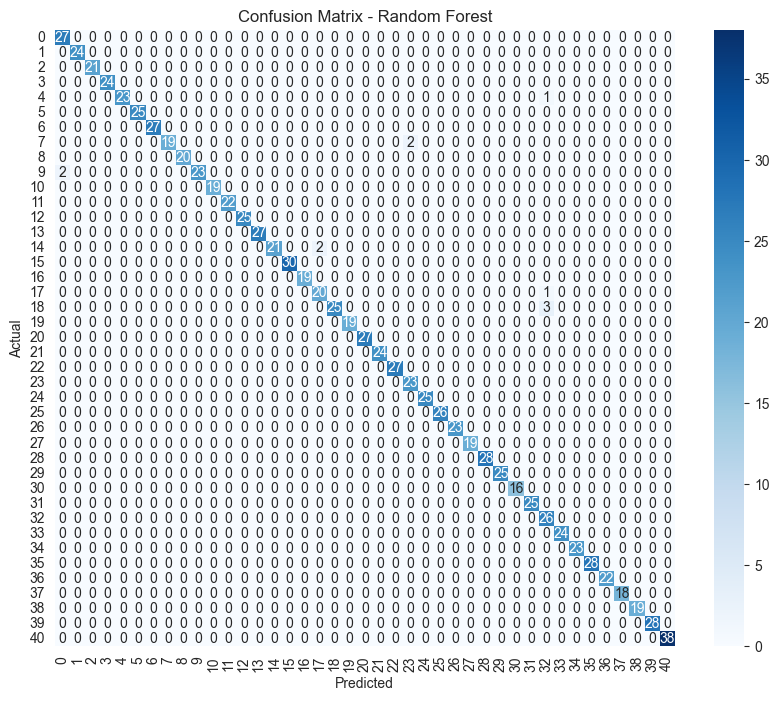

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_RFC)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

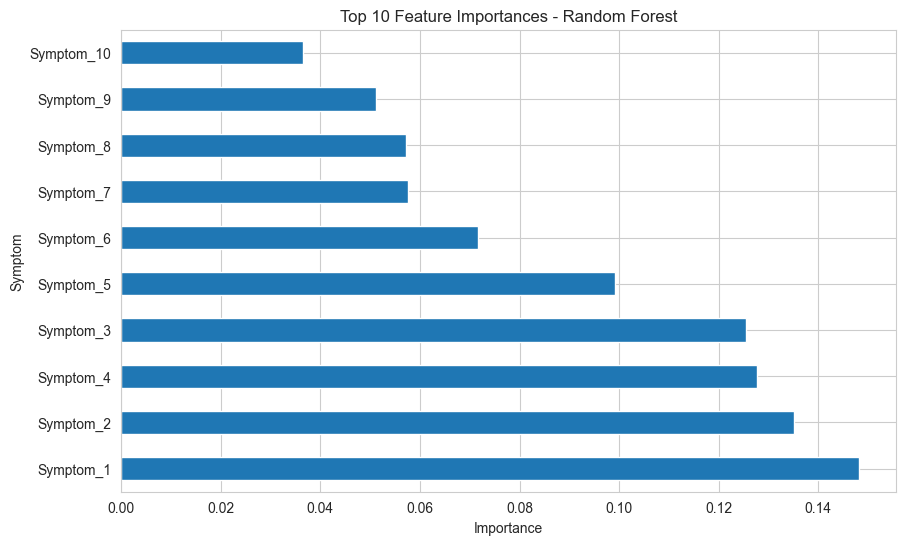

In [42]:
# Feature Importance
feature_importance = pd.Series(model_RFC.feature_importances_, index=symptom_cols)
plt.figure(figsize=(10, 6))
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Symptom")
plt.show()

**By using Random Forest Classifier we got Accuracy = 99%**

## **Model 2: Neural Network --> MLPClassifier**

In [43]:
from sklearn.neural_network import MLPClassifier

In [44]:
model_MLPC = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two layers
    max_iter=500,                  # More iterations for convergence
    random_state=42
)

Train Model

In [45]:
model_MLPC.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [46]:
# Cross-validation
cv_scores_mlpc = cross_val_score(model_MLPC, X, y, cv=5)
print("Cross-Validation Scores (MLP):", cv_scores_mlpc)
print("Mean CV Accuracy (MLP):", cv_scores_mlpc.mean())

Cross-Validation Scores (MLP): [0.99187817 0.98781726 0.99593909 1.         0.99796954]
Mean CV Accuracy (MLP): 0.9947208121827412


Make the prediction

In [47]:
# Predict and evaluate
y_MLPC = model_MLPC.predict(X_test)
print("MLPClassifier Classification Report:")
print(classification_report(y_test, y_MLPC))

MLPClassifier Classification Report:
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      0.90      0.95        21
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        25
                            Common Cold       1.00      1.00      1.00 

In [48]:
# Confidence scores
y_MLPC_probs = model_MLPC.predict_proba(X_test)
print("Sample Confidence Scores (Top 5):", y_MLPC_probs[:5].max(axis=1))

Sample Confidence Scores (Top 5): [0.95820559 0.99980016 0.99996248 0.99986955 0.99999909]


**Evaluate the model**

In [49]:
print(classification_report(y_test,y_MLPC))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        27
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        21
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       0.92      1.00      0.96        24
                              Arthritis       1.00      1.00      1.00        25
                       Bronchial Asthma       1.00      1.00      1.00        27
                   Cervical spondylosis       1.00      0.90      0.95        21
                            Chicken pox       1.00      1.00      1.00        20
                    Chronic cholestasis       1.00      1.00      1.00        25
                            Common Cold       1.00      1.00      1.00        19
                           

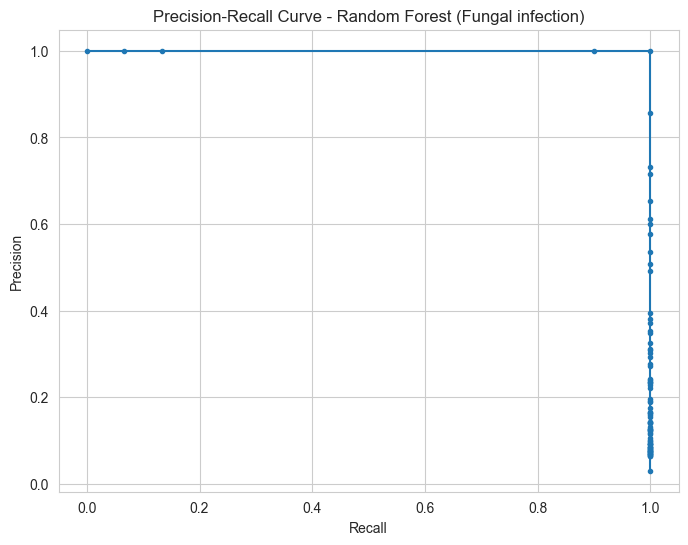

In [50]:
# For RFC (binary example for one disease, e.g., 'Fungal infection')
y_test_bin = (y_test == 'Fungal infection').astype(int)
y_RFC_probs_bin = y_RFC_probs[:, list(model_RFC.classes_).index('Fungal infection')]
precision, recall, _ = precision_recall_curve(y_test_bin, y_RFC_probs_bin)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title("Precision-Recall Curve - Random Forest (Fungal infection)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [51]:
print("Choosing Random Forest due to interpretability and slightly better consistency in CV scores.")

Choosing Random Forest due to interpretability and slightly better consistency in CV scores.


**By using the Neural Network --> MLPClassfier we also got the Accuracy = 99%**

By comparing the F1_score of both the model, I decide to go further with RFC(Random Forest Classifier) Model

# **Test the model Manuallly**

In [52]:
y_man = model_RFC.predict([[3, 3,	3, 2, 2, 2,	0, 0,	0, 0,	0, 0,	0, 0,	0, 0,	0]])

In [53]:
print("Manual Prediction: ",y_man)

Manual Prediction:  ['Psoriasis']


# **Save Model : Model_RFC(Random Forest Classifier)**

In [54]:
import pickle

In [55]:
pickle.dump(model_RFC, open('model_RFC.sav', 'wb'))
load_RFC = pickle.load(open('model_RFC.sav', 'rb'))
prediction = load_RFC.predict([[3, 3, 3, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
print("Loaded Model Prediction:", prediction)

Loaded Model Prediction: ['Psoriasis']
